### Introduction to Machine Learning: Clustering
#### Corey Solitaire
#### 10/09/2020

In [1]:
import acquire
import prepare
# import src.explore
# import src.model
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression, SelectKBest, RFE 
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

### Acquire & Summarize

**1. Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe. Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database.**

    - Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid.
    - Only include properties with a transaction in 2017, and include only the last transaction for each properity (so no duplicate property ID's), along with zestimate error and date of transaction.
    - Only include properties that include a latitude and longitude value.

In [2]:
# Acquire df
df = acquire.get_zillow_data(cached=True)

In [3]:
df.shape

(77381, 70)

In [4]:
# Rename duplicate column id/id with id_delete/id
df.columns = ['parcelid', 'typeconstructiontypeid', 'storytypeid',
       'propertylandusetypeid', 'heatingorsystemtypeid', 'buildingclasstypeid',
       'architecturalstyletypeid', 'airconditioningtypeid', 'id_delete',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedbathnbr', 'decktypeid', 'finishedfloor1squarefeet',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
       'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50',
       'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt',
       'garagecarcnt', 'garagetotalsqft', 'hashottuborspa', 'latitude',
       'longitude', 'lotsizesquarefeet', 'poolcnt', 'poolsizesum',
       'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertyzoningdesc',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidneighborhood', 'regionidzip', 'roomcnt', 'threequarterbathnbr',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt',
       'numberofstories', 'fireplaceflag', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'taxdelinquencyflag', 'taxdelinquencyyear',
       'censustractandblock', 'id', 'logerror', 'pid', 'tdate',
       'airconditioningdesc', 'architecturalstyledesc', 'buildingclassdesc',
       'heatingorsystemdesc', 'propertylandusedesc', 'storydesc',
       'typeconstructiondesc']

In [5]:
# Delete duplicate columns id_delete and pid (dupilcate of parcelid)
df.drop(columns = ['id_delete','pid'], inplace = True)
df.shape()

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,basementsqft,bathroomcnt,...,id,logerror,tdate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,14297519,NaN,NaN,261.0,NaN,NaN,NaN,NaN,NaN,3.5,...,0,0.025595,2017-01-01,None,None,None,None,Single Family Residential,None,None
1,17052889,NaN,NaN,261.0,NaN,NaN,NaN,NaN,NaN,1.0,...,1,0.055619,2017-01-01,None,None,None,None,Single Family Residential,None,None
2,14186244,NaN,NaN,261.0,NaN,NaN,NaN,NaN,NaN,2.0,...,2,0.005383,2017-01-01,None,None,None,None,Single Family Residential,None,None
3,12177905,NaN,NaN,261.0,2.0,NaN,NaN,NaN,NaN,3.0,...,3,-0.103410,2017-01-01,None,None,None,Central,Single Family Residential,None,None
4,10887214,NaN,NaN,266.0,2.0,NaN,NaN,1.0,NaN,3.0,...,4,0.006940,2017-01-01,Central,None,None,Central,Condominium,None,None


***

**2. Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)**

***

In [12]:
def df_summary(df):
    print('The shape of the df:') 
    print(df.shape)  # df shape (row/column)
    print('\n')
    print('Columns, Non-Null Count, Data Type:')
    print(df.info())      # Column, Non Null Count, Data Type
    print('\n')
    print('Summary statistics for the df:') 
    print(df.describe())             # Summary Statistics on Numeric Data Types
    print('\n')
    print('Number of NaN values per column:') 
    print(df.isna().sum())           # NaN by column
    print('\n')
    print('Number of NaN values per row:')  
    print(df.isnull().sum(axis=1))   # NaN by row
    print('\n')
    print('Value Counts per Column:')
    for col in df.columns:
        print('-' * 40 + col + '-' * 40 , end=' - ')
        display(df[col].value_counts().head(10))
        #display(df_resp[col].value_counts())  # Displays all Values, not just First 10

In [13]:
df_summary(df)

The shape of the df:
(77381, 68)


Columns, Non-Null Count, Data Type:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77381 entries, 0 to 77380
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77381 non-null  int64  
 1   typeconstructiontypeid        222 non-null    float64
 2   storytypeid                   50 non-null     float64
 3   propertylandusetypeid         77381 non-null  float64
 4   heatingorsystemtypeid         49440 non-null  float64
 5   buildingclasstypeid           15 non-null     float64
 6   architecturalstyletypeid      206 non-null    float64
 7   airconditioningtypeid         24953 non-null  float64
 8   basementsqft                  50 non-null     float64
 9   bathroomcnt                   77381 non-null  float64
 10  bedroomcnt                    77381 non-null  float64
 11  buildingqualitytypeid         49672 non-null  fl

12086286    1
13842812    1
17089101    1
14604878    1
11149905    1
12104347    1
11077074    1
17173076    1
12714581    1
12458582    1
Name: parcelid, dtype: int64

----------------------------------------typeconstructiontypeid---------------------------------------- - 

6.0     219
4.0       1
13.0      1
10.0      1
Name: typeconstructiontypeid, dtype: int64

----------------------------------------storytypeid---------------------------------------- - 

7.0    50
Name: storytypeid, dtype: int64

----------------------------------------propertylandusetypeid---------------------------------------- - 

261.0    52320
266.0    19294
246.0     2009
269.0     1944
248.0      727
247.0      535
265.0      333
263.0       74
275.0       58
260.0       37
Name: propertylandusetypeid, dtype: int64

----------------------------------------heatingorsystemtypeid---------------------------------------- - 

2.0     33550
7.0     14065
24.0      846
6.0       776
20.0      104
13.0       59
18.0       23
1.0        13
10.0        3
11.0        1
Name: heatingorsystemtypeid, dtype: int64

----------------------------------------buildingclasstypeid---------------------------------------- - 

4.0    14
3.0     1
Name: buildingclasstypeid, dtype: int64

----------------------------------------architecturalstyletypeid---------------------------------------- - 

7.0     172
8.0      19
21.0      7
2.0       5
3.0       3
Name: architecturalstyletypeid, dtype: int64

----------------------------------------airconditioningtypeid---------------------------------------- - 

1.0     23133
13.0     1574
5.0       167
11.0       53
9.0        26
Name: airconditioningtypeid, dtype: int64

----------------------------------------basementsqft---------------------------------------- - 

700.0     2
515.0     2
900.0     2
912.0     2
640.0     2
273.0     2
100.0     2
3560.0    1
669.0     1
252.0     1
Name: basementsqft, dtype: int64

----------------------------------------bathroomcnt---------------------------------------- - 

2.0    31485
3.0    17313
1.0    12902
2.5     6604
4.0     3352
1.5     1415
3.5     1034
5.0     1026
4.5      695
0.0      592
Name: bathroomcnt, dtype: int64

----------------------------------------bedroomcnt---------------------------------------- - 

3.0    30362
2.0    19169
4.0    17513
5.0     4543
1.0     3379
6.0      998
0.0      830
8.0      252
7.0      208
9.0       70
Name: bedroomcnt, dtype: int64

----------------------------------------buildingqualitytypeid---------------------------------------- - 

8.0     14645
6.0     13462
4.0      9483
7.0      5971
9.0      2299
5.0      2088
11.0      931
3.0       329
10.0      313
12.0      116
Name: buildingqualitytypeid, dtype: int64

----------------------------------------calculatedbathnbr---------------------------------------- - 

2.0    31485
3.0    17313
1.0    12902
2.5     6595
4.0     3352
1.5     1408
3.5     1034
5.0     1026
4.5      695
6.0      417
Name: calculatedbathnbr, dtype: int64

----------------------------------------decktypeid---------------------------------------- - 

66.0    614
Name: decktypeid, dtype: int64

----------------------------------------finishedfloor1squarefeet---------------------------------------- - 

1252.0    22
1205.0    21
780.0     21
1462.0    21
1498.0    21
1441.0    21
1070.0    20
1227.0    19
1431.0    18
880.0     17
Name: finishedfloor1squarefeet, dtype: int64

----------------------------------------calculatedfinishedsquarefeet---------------------------------------- - 

1200.0    181
1120.0    169
1440.0    147
1080.0    132
1260.0    120
1176.0    119
1300.0    118
1040.0    118
1570.0    117
1232.0    117
Name: calculatedfinishedsquarefeet, dtype: int64

----------------------------------------finishedsquarefeet12---------------------------------------- - 

1200.0    176
1120.0    165
1080.0    131
1440.0    120
1260.0    116
1040.0    116
1232.0    116
1300.0    114
1570.0    114
1400.0    112
Name: finishedsquarefeet12, dtype: int64

----------------------------------------finishedsquarefeet13---------------------------------------- - 

1440.0    18
1344.0     5
1488.0     3
1536.0     3
1248.0     2
1152.0     2
1392.0     2
1512.0     1
1200.0     1
1060.0     1
Name: finishedsquarefeet13, dtype: int64

----------------------------------------finishedsquarefeet15---------------------------------------- - 

1680.0    16
1536.0    12
2016.0    12
1600.0    10
1440.0     9
1560.0     9
1512.0     9
1584.0     8
1740.0     8
1864.0     7
Name: finishedsquarefeet15, dtype: int64

----------------------------------------finishedsquarefeet50---------------------------------------- - 

1252.0    22
1498.0    21
780.0     21
1462.0    21
1205.0    21
1441.0    21
1070.0    20
1227.0    19
1431.0    18
1226.0    17
Name: finishedsquarefeet50, dtype: int64

----------------------------------------finishedsquarefeet6---------------------------------------- - 

952.0     4
3552.0    3
3500.0    3
520.0     3
750.0     3
935.0     2
912.0     2
2361.0    2
624.0     2
2635.0    2
Name: finishedsquarefeet6, dtype: int64

----------------------------------------fips---------------------------------------- - 

6037.0    50551
6059.0    20593
6111.0     6237
Name: fips, dtype: int64

----------------------------------------fireplacecnt---------------------------------------- - 

1.0    7008
2.0     995
3.0     235
4.0      35
5.0       3
Name: fireplacecnt, dtype: int64

----------------------------------------fullbathcnt---------------------------------------- - 

2.0     38097
3.0     18351
1.0     14310
4.0      4048
5.0      1245
6.0       454
7.0       121
8.0       111
9.0        23
10.0        7
Name: fullbathcnt, dtype: int64

----------------------------------------garagecarcnt---------------------------------------- - 

2.0     18608
1.0      5676
3.0       632
4.0       255
0.0       230
5.0        45
6.0        14
7.0         4
10.0        3
9.0         2
Name: garagecarcnt, dtype: int64

----------------------------------------garagetotalsqft---------------------------------------- - 

0.0      7685
400.0     786
441.0     678
462.0     658
360.0     646
460.0     569
420.0     549
440.0     539
483.0     413
480.0     303
Name: garagetotalsqft, dtype: int64

----------------------------------------hashottuborspa---------------------------------------- - 

1.0    1538
Name: hashottuborspa, dtype: int64

----------------------------------------latitude---------------------------------------- - 

33984600.0    40
33665651.0    38
33766300.0    34
34056700.0    32
34225100.0    29
34410700.0    27
33785200.0    27
33954400.0    26
34171800.0    25
34048000.0    23
Name: latitude, dtype: int64

----------------------------------------longitude---------------------------------------- - 

-118438000.0    63
-118435000.0    62
-118390000.0    60
-118445000.0    60
-118377000.0    59
-118389000.0    58
-118433000.0    56
-118188000.0    55
-118432000.0    55
-118378000.0    52
Name: longitude, dtype: int64

----------------------------------------lotsizesquarefeet---------------------------------------- - 

6000.0    892
5000.0    437
7200.0    314
7000.0    297
6500.0    294
7500.0    238
6600.0    167
5400.0    145
4000.0    143
5200.0    137
Name: lotsizesquarefeet, dtype: int64

----------------------------------------poolcnt---------------------------------------- - 

1.0    16137
Name: poolcnt, dtype: int64

----------------------------------------poolsizesum---------------------------------------- - 

450.0    90
400.0    38
500.0    30
600.0    27
512.0    25
800.0    25
480.0    19
544.0    14
576.0    14
360.0    13
Name: poolsizesum, dtype: int64

----------------------------------------pooltypeid10---------------------------------------- - 

1.0    464
Name: pooltypeid10, dtype: int64

----------------------------------------pooltypeid2---------------------------------------- - 

1.0    1074
Name: pooltypeid2, dtype: int64

----------------------------------------pooltypeid7---------------------------------------- - 

1.0    15042
Name: pooltypeid7, dtype: int64

----------------------------------------propertycountylandusecode---------------------------------------- - 

0100    26714
122     13045
010C     8813
0101     6399
34       4922
1111     3353
1        2393
010E     2047
010D     1943
0200     1835
Name: propertycountylandusecode, dtype: int64

----------------------------------------propertyzoningdesc---------------------------------------- - 

LAR1       6747
LAR3       2437
LARS       1389
LBR1N      1222
LARD1.5    1127
LAR2       1031
SCUR2       956
LARD2       849
LARA        654
LARE11      628
Name: propertyzoningdesc, dtype: int64

----------------------------------------rawcensustractandblock---------------------------------------- - 

6.059063e+07    60
6.037137e+07    60
6.037920e+07    58
6.037277e+07    51
6.059032e+07    43
6.037139e+07    40
6.059063e+07    39
6.037274e+07    39
6.037577e+07    39
6.037578e+07    38
Name: rawcensustractandblock, dtype: int64

----------------------------------------regionidcity---------------------------------------- - 

12447.0    17948
46298.0     2588
5534.0      1912
54311.0     1880
52650.0     1669
40227.0     1590
16764.0     1467
25218.0     1354
34278.0     1195
27110.0     1107
Name: regionidcity, dtype: int64

----------------------------------------regionidcounty---------------------------------------- - 

3101.0    50551
1286.0    20593
2061.0     6237
Name: regionidcounty, dtype: int64

----------------------------------------regionidneighborhood---------------------------------------- - 

27080.0     717
48570.0     704
37739.0     684
118208.0    669
51906.0     549
268496.0    531
48200.0     525
54300.0     521
274049.0    466
113455.0    458
Name: regionidneighborhood, dtype: int64

----------------------------------------regionidzip---------------------------------------- - 

97319.0    825
96987.0    753
97318.0    708
97118.0    613
96974.0    593
96993.0    591
97328.0    589
97329.0    587
96962.0    525
96996.0    520
Name: regionidzip, dtype: int64

----------------------------------------roomcnt---------------------------------------- - 

0.0     59808
6.0      4513
7.0      3838
5.0      3016
8.0      2872
4.0      1415
9.0      1193
10.0      339
3.0       211
11.0      108
Name: roomcnt, dtype: int64

----------------------------------------threequarterbathnbr---------------------------------------- - 

1.0    10012
2.0       75
3.0        8
7.0        1
Name: threequarterbathnbr, dtype: int64

----------------------------------------unitcnt---------------------------------------- - 

1.0      47293
2.0       2018
4.0        723
3.0        525
6.0          1
45.0         1
237.0        1
42.0         1
Name: unitcnt, dtype: int64

----------------------------------------yardbuildingsqft17---------------------------------------- - 

200.0    103
240.0     76
300.0     50
180.0     42
120.0     38
288.0     38
400.0     37
360.0     35
280.0     33
144.0     30
Name: yardbuildingsqft17, dtype: int64

----------------------------------------yardbuildingsqft26---------------------------------------- - 

120.0    3
30.0     3
56.0     2
88.0     2
33.0     2
240.0    2
300.0    2
144.0    2
448.0    2
169.0    1
Name: yardbuildingsqft26, dtype: int64

----------------------------------------yearbuilt---------------------------------------- - 

1955.0    1969
1989.0    1787
1950.0    1673
1964.0    1642
1954.0    1583
1973.0    1567
1953.0    1549
1956.0    1448
1987.0    1430
1979.0    1428
Name: yearbuilt, dtype: int64

----------------------------------------numberofstories---------------------------------------- - 

1.0    10366
2.0     6757
3.0      436
6.0        1
Name: numberofstories, dtype: int64

----------------------------------------fireplaceflag---------------------------------------- - 

1.0    172
Name: fireplaceflag, dtype: int64

----------------------------------------structuretaxvaluedollarcnt---------------------------------------- - 

100000.0    82
200000.0    58
203050.0    55
90000.0     52
95000.0     49
101525.0    49
120000.0    44
207106.0    43
110000.0    42
150000.0    41
Name: structuretaxvaluedollarcnt, dtype: int64

----------------------------------------taxvaluedollarcnt---------------------------------------- - 

400000.0    56
600000.0    50
350000.0    49
450000.0    45
500000.0    43
420000.0    43
455000.0    43
340000.0    42
375000.0    41
300000.0    40
Name: taxvaluedollarcnt, dtype: int64

----------------------------------------assessmentyear---------------------------------------- - 

2016.0    77381
Name: assessmentyear, dtype: int64

----------------------------------------landtaxvaluedollarcnt---------------------------------------- - 

21299.0     97
22755.0     68
304575.0    65
203050.0    63
30210.0     63
212207.0    61
208047.0    59
18611.0     56
16749.0     55
16522.0     53
Name: landtaxvaluedollarcnt, dtype: int64

----------------------------------------taxamount---------------------------------------- - 

2418.22    8
3720.52    7
2217.31    5
1725.20    5
3815.22    5
4401.72    5
2388.63    4
345.72     4
3860.10    4
3700.94    4
Name: taxamount, dtype: int64

----------------------------------------taxdelinquencyflag---------------------------------------- - 

Y    2886
Name: taxdelinquencyflag, dtype: int64

----------------------------------------taxdelinquencyyear---------------------------------------- - 

15.0    1552
14.0     799
13.0     183
12.0     113
11.0      98
10.0      66
9.0       47
8.0       14
7.0       10
6.0        1
Name: taxdelinquencyyear, dtype: int64

----------------------------------------censustractandblock---------------------------------------- - 

6.037137e+13    60
6.037277e+13    51
6.059032e+13    44
6.059063e+13    41
6.037920e+13    41
6.037139e+13    40
6.037920e+13    40
6.059063e+13    40
6.037577e+13    39
6.037578e+13    38
Name: censustractandblock, dtype: int64

----------------------------------------id---------------------------------------- - 

2047     1
4759     1
25241    1
31386    1
29339    1
19100    1
17053    1
23198    1
21151    1
76464    1
Name: id, dtype: int64

----------------------------------------logerror---------------------------------------- - 

0.000231    7
0.002652    7
0.008932    5
0.006909    5
0.011157    5
0.003152    5
0.000727    5
0.008257    5
0.001878    5
0.000420    5
Name: logerror, dtype: int64

----------------------------------------tdate---------------------------------------- - 

2017-06-30    1189
2017-04-28     911
2017-05-31     867
2017-07-28     814
2017-08-31     781
2017-03-31     770
2017-05-26     743
2017-06-16     727
2017-06-23     706
2017-08-25     696
Name: tdate, dtype: int64

----------------------------------------airconditioningdesc---------------------------------------- - 

Central          23133
Yes               1574
None               167
Wall Unit           53
Refrigeration       26
Name: airconditioningdesc, dtype: int64

----------------------------------------architecturalstyledesc---------------------------------------- - 

Contemporary     172
Conventional      19
Ranch/Rambler      7
Bungalow           5
Cape Cod           3
Name: architecturalstyledesc, dtype: int64

----------------------------------------buildingclassdesc---------------------------------------- - 

Buildings having wood or wood and steel frames                                                                                                                                                                                             14
Buildings having exterior walls built of a non-combustible material such as brick, concrete, block or poured concrete. Interior partitions and roof structures are built of combustible materials. Floor may be concrete or wood frame.     1
Name: buildingclassdesc, dtype: int64

----------------------------------------heatingorsystemdesc---------------------------------------- - 

Central       33550
Floor/Wall    14065
Yes             846
Forced air      776
Solar           104
None             59
Radiant          23
Baseboard        13
Gravity           3
Heat Pump         1
Name: heatingorsystemdesc, dtype: int64

----------------------------------------propertylandusedesc---------------------------------------- - 

Single Family Residential                     52320
Condominium                                   19294
Duplex (2 Units, Any Combination)              2009
Planned Unit Development                       1944
Quadruplex (4 Units, Any Combination)           727
Triplex (3 Units, Any Combination)              535
Cluster Home                                    333
Mobile Home                                      74
Manufactured, Modular, Prefabricated Homes       58
Residential General                              37
Name: propertylandusedesc, dtype: int64

----------------------------------------storydesc---------------------------------------- - 

Basement    50
Name: storydesc, dtype: int64

----------------------------------------typeconstructiondesc---------------------------------------- - 

Frame       219
Metal         1
Concrete      1
Masonry       1
Name: typeconstructiondesc, dtype: int64

***

**3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.** 

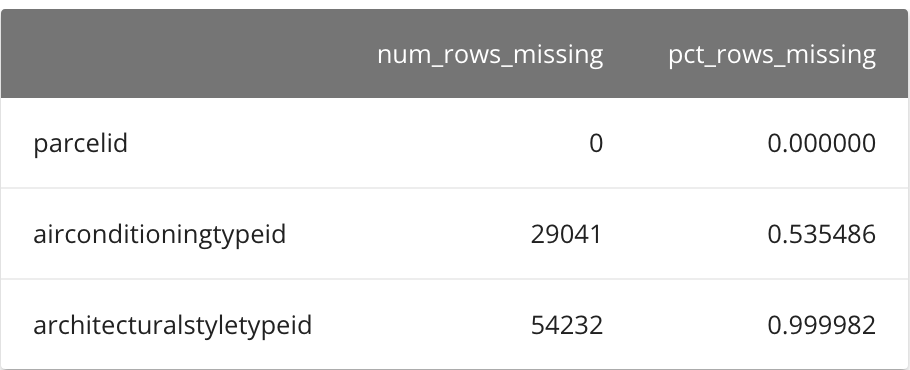

***

In [ ]:
def count_and_percent_missing(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    total_missing = df.isnull().sum()
    missing_value_df = pd.DataFrame({'total_missing': total_missing,
                                     'percent_missing': percent_missing})
    return missing_value_df

In [ ]:
count_and_percent_missing(df)

***

**4. Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.** 

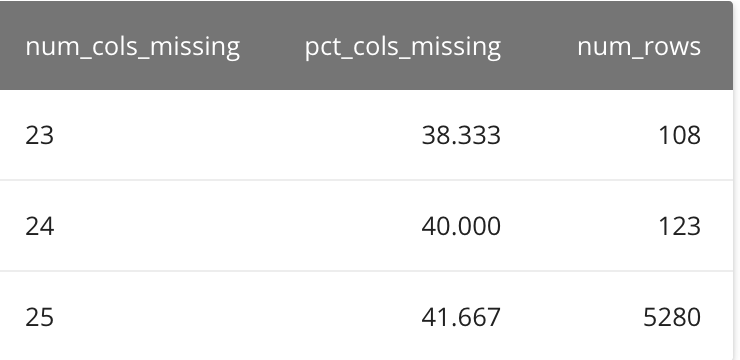

***

In [ ]:
#df.apply(lambda x: x.value_counts()).T.stack()
def to_frequency_table(df):
    frequencytable = {}
    for key in df:
        if key in frequencytable:
            frequencytable[key] += 1
        else:
            frequencytable[key] = 1
    return frequencytable
to_frequency_table(df)

In [ ]:
# num_rows = lambda x:(df.iloc[x].isnull().sum())
# num_cols_missing = df.loc[:, df.isna().any()].count()
# pct_cols_missing = round(df.loc[:, df.isna().any()].count() / len(df.index),3)
# missing_cols_and_rows_df = pd.DataFrame({'num_cols_missing': num_cols_missing,
#                                          'pct_cols_missing': pct_cols_missing,
#                                          'num_rows': num_rows})
# missing_cols_and_rows_df

In [ ]:
num_cols_missing = df.loc[:, df.isna().any()].count()
pct_cols_missing = round(df.loc[:, df.isna().any()].count() / len(df.index),3)
missing_cols_and_rows_df = pd.DataFrame({'num_cols_missing': num_cols_missing,
                                         'pct_cols_missing': pct_cols_missing})
                                        
missing_cols_and_rows_df

In [ ]:
len(df.index)

In [ ]:
len(df.columns)

### Prep Data Function:

In [ ]:
# Function to Prep Data
def data_prep(df, cols_to_remove=[], prop_required_column=.5, prop_required_row=.75):
    
    def remove_columns(df, cols_to_remove):  
        df = df.drop(columns=cols_to_remove)
        return df

    def handle_missing_values(df, prop_required_column = .5, prop_required_row = .75):
        threshold = int(round(prop_required_column*len(df.index),0))
        df.dropna(axis=1, thresh=threshold, inplace=True)
        threshold = int(round(prop_required_row*len(df.columns),0))
        df.dropna(axis=0, thresh=threshold, inplace=True)
        return df
    
    df = remove_columns(df, cols_to_remove)  # Removes Specified Columns
    df = handle_missing_values(df, prop_required_column, prop_required_row) # Removes Specified Rows
    #df.dropna(inplace=True) # Drops all Null Values From Dataframe
    return df


# How to Call the Function
# df = prepare.data_prep(
#     df,
#     cols_to_remove=[],
#     prop_required_column=.6,
#     prop_required_row=.75
# )